# Pre-processing the Data

1) Cleaning the data

In [1]:
#Loading the dataset
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import numpy as np
df= pd.read_csv('/Users/mohabyasser/Downloads/2010_Accidents_UK.csv')
df

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,201001BS70003,2010,01BS70003,527580.0,177730.0,-0.164002,51.484087,Metropolitan Police,Slight,2,...,No physical crossing facilities within 50 metres,Daylight,Other,Wet or damp,None,None,Urban,Yes,Non-trunk,E01002900
1,201001BS70004,2010,01BS70004,525340.0,180470.0,-0.195273,51.509212,Metropolitan Police,Slight,1,...,Pedestrian phase at traffic signal junction,Darkness - lights lit,Raining no high winds,Wet or damp,None,None,Urban,Yes,Non-trunk,E01002884
2,201001BS70006,2010,01BS70006,524800.0,180300.0,-0.203110,51.507804,Metropolitan Police,Slight,2,...,Pedestrian phase at traffic signal junction,Daylight,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002871
3,201001BS70007,2010,01BS70007,525080.0,180920.0,-0.198858,51.513314,Metropolitan Police,Slight,2,...,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002886
4,201001BS70008,2010,01BS70008,526760.0,177740.0,-0.175802,51.484361,Metropolitan Police,Slight,2,...,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Wet or damp,None,None,Urban,Yes,Non-trunk,E01002845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154409,2010984142510,2010,984142510,328910.0,568230.0,-3.112969,55.003563,Dumfries and Galloway,Slight,1,...,No physical crossing facilities within 50 metres,Daylight,Snowing no high winds,Frost or ice,None,None,Rural,Yes,Data missing or out of range,-1
154410,2010984143110,2010,984143110,322170.0,573610.0,-3.219785,55.050889,Dumfries and Galloway,Slight,1,...,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Frost or ice,None,None,Rural,Yes,Data missing or out of range,-1
154411,2010984144210,2010,984144210,319480.0,566660.0,-3.259920,54.988020,Dumfries and Galloway,Slight,1,...,"Pelican, puffin, toucan or similar non-junctio...",Daylight,Fine no high winds,Wet or damp,None,None,Rural,No,Data missing or out of range,-1
154412,2010984144310,2010,984144310,310200.0,581000.0,-3.409423,55.115256,Dumfries and Galloway,Slight,2,...,No physical crossing facilities within 50 metres,Darkness - no lighting,Fog or mist,Wet or damp,None,None,Rural,Yes,Data missing or out of range,-1


In [2]:
#Removing irrelevant columns 
dfnew=df.copy()
columns_to_remove = ['accident_index',
                     'accident_year',
                     'accident_reference',
                     'location_easting_osgr',
                     'location_northing_osgr',
                     'longitude',
                     'latitude',
                     'date',
                     'day_of_week',
                     'police_force',
                     'first_road_number',
                     'local_authority_district',
                     'local_authority_ons_district',
                     'local_authority_highway',
                     'lsoa_of_accident_location']
#first_road_number dropped when encoding categorial values as it had 3000+ unique values
dfnew = dfnew.drop(columns_to_remove, axis=1)
dfnew

,accident_severity,number_of_vehicles,number_of_casualties,time,first_road_class,road_type,speed_limit,junction_detail,junction_control,second_road_class,...,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag
0,Slight,2,1,07:30,B,Single carriageway,30.0,T or staggered junction,Give way or uncontrolled,Unclassified,...,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Other,Wet or damp,None,None,Urban,Yes,Non-trunk
1,Slight,1,1,18:35,A,Single carriageway,30.0,T or staggered junction,Auto traffic signal,A,...,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness - lights lit,Raining no high winds,Wet or damp,None,None,Urban,Yes,Non-trunk
2,Slight,2,1,10:22,A,Single carriageway,30.0,T or staggered junction,Auto traffic signal,B,...,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk
3,Slight,2,1,21:21,Unclassified,Roundabout,30.0,Mini-roundabout,Give way or uncontrolled,Unclassified,...,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk
4,Slight,2,1,20:35,A,Single carriageway,30.0,Crossroads,Auto traffic signal,A,...,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Wet or damp,None,None,Urban,Yes,Non-trunk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154409,Slight,1,1,13:45,C,Single carriageway,60.0,Not at junction or within 20 metres,Data missing or out of range,-1,...,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Snowing no high winds,Frost or ice,None,None,Rural,Yes,Data missing or out of range
154410,Slight,1,1,02:30,B,Roundabout,60.0,Roundabout,Give way or uncontrolled,A(M),...,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Frost or ice,None,None,Rural,Yes,Data missing or out of range
154411,Slight,1,1,15:20,Unclassified,Single carriageway,30.0,T or staggered junction,Give way or uncontrolled,Unclassified,...,None within 50 metres,"Pelican, puffin, toucan or similar non-junctio...",Daylight,Fine no high winds,Wet or damp,None,None,Rural,No,Data missing or out of range
154412,Slight,2,2,17:46,A,Single carriageway,60.0,T or staggered junction,Give way or uncontrolled,C,...,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - no lighting,Fog or mist,Wet or damp,None,None,Rural,Yes,Data missing or out of range


In [3]:
# Calculating sum of null entries
sum_null = dfnew.isnull().sum()
sum_null

accident_severity                                  0
number_of_vehicles                                 0
number_of_casualties                               0
time                                               0
first_road_class                                   0
road_type                                        704
speed_limit                                        0
junction_detail                                    0
junction_control                                   0
second_road_class                                  0
second_road_number                             63523
pedestrian_crossing_human_control                  0
pedestrian_crossing_physical_facilities            0
light_conditions                                   0
weather_conditions                              2729
road_surface_conditions                            0
special_conditions_at_site                         0
carriageway_hazards                                0
urban_or_rural_area                           

In [4]:
print(f'Initial number of entries = {dfnew.shape[0]}')
#Drop Rows that have missing values in "road_type" ; MCAR and only 0.46%
dfnew = dfnew.dropna(axis='index', subset=['road_type'])

#Drop Rows that have missing values in "weather_conditions" ; MAR and only 1.77%
dfnew = dfnew.dropna(axis='index', subset=['weather_conditions'])

print(f'Updated number of entries after removing missing data = {dfnew.shape[0]}')
#Drop the "second_road_number" column ; 41.14% missing entries
dfnew = dfnew.drop('second_road_number', axis=1)

#Drop the Duplicate entries
print(f"Number of Duplicates in Dataset : {dfnew.duplicated().sum()}")
dfnew = dfnew.drop_duplicates()
print(f'Number of entries After removing duplicates = {dfnew.shape[0]}')

Initial number of entries = 154414
Updated number of entries after removing missing data = 151055
Number of Duplicates in Dataset : 11921
Number of entries After removing duplicates = 139134


___________________________
2) Handling Outliers

In [5]:
dfnew.describe()

,number_of_vehicles,number_of_casualties,speed_limit
count,139134.000000,139134.000000,139134.000000
mean,1.832579,1.378649,39.454231
std,0.720945,0.852546,14.305823
min,1.000000,1.000000,10.000000
25%,1.000000,1.000000,30.000000
50%,2.000000,1.000000,30.000000
75%,2.000000,2.000000,50.000000
max,19.000000,43.000000,70.000000


IQR = 1.0
Lower = -0.5
Upper = 3.5
Total number of outliers are 3261
Number of entries before = 139134
Number of entries after = 135873


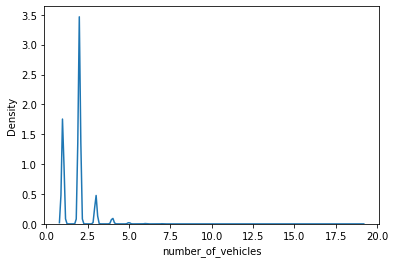

In [6]:
sns.kdeplot(dfnew['number_of_vehicles'])
#Calculating IQR
Q1 = dfnew.number_of_vehicles.quantile(0.25)
Q3 = dfnew.number_of_vehicles.quantile(0.75)
IQR = Q3 - Q1
print(f'IQR = {IQR}')

cut_off = IQR * 1.5
lower = Q1 - cut_off
upper =  Q3 + cut_off
print(f'Lower = {lower}\nUpper = {upper}')

df1 = dfnew[dfnew['number_of_vehicles']> upper]
df2 = dfnew[dfnew['number_of_vehicles'] < lower]
print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

print(f'Number of entries before = {dfnew.shape[0]}')
dfnew = dfnew[(dfnew['number_of_vehicles'] < upper) & (dfnew['number_of_vehicles'] > lower)]
print(f'Number of entries after = {dfnew.shape[0]}')

IQR = 20.0
Lower = 0.0
Upper = 80.0
Total number of outliers are 0
From the box plot it is also apparent that speed_limit contains no outliers


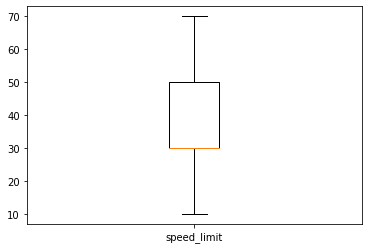

In [7]:
plt.boxplot(df[['speed_limit']].values, labels=['speed_limit'])
#Calculating IQR
Q1 = dfnew.speed_limit.quantile(0.25)
Q3 = dfnew.speed_limit.quantile(0.75)
IQR = Q3 - Q1
print(f'IQR = {IQR}')

cut_off = IQR * 1.5
lower = Q1 - cut_off
upper =  Q3 + cut_off
print(f'Lower = {lower}\nUpper = {upper}')

df1 = dfnew[dfnew['speed_limit']> upper]
df2 = dfnew[dfnew['speed_limit'] < lower]
print('Total number of outliers are', df1.shape[0]+ df2.shape[0])
print("From the box plot it is also apparent that speed_limit contains no outliers")


In [8]:
df.number_of_casualties.value_counts()

1     118377
2      24845
3       7045
4       2655
5        911
6        340
7        123
8         47
9         21
10        14
12         7
11         6
17         4
13         3
15         2
14         2
43         2
24         2
16         2
26         1
22         1
42         1
40         1
36         1
18         1
Name: number_of_casualties, dtype: int64

Number of entries before = 135873
Number of entries after = 132282


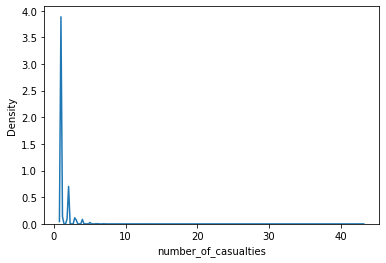

In [9]:
#Using Z-Score to identify outliers
sns.kdeplot(dfnew["number_of_casualties"])
z = np.abs(stats.zscore(dfnew['number_of_casualties']))
filtered_entries = z < 3
filtered_entries.value_counts()
print(f'Number of entries before = {dfnew.shape[0]}')
dfnew = dfnew[filtered_entries]
print(f'Number of entries after = {dfnew.shape[0]}')

___________
3) Enconding categorial values

In [11]:
dfnew.head(5)

,accident_severity,number_of_vehicles,number_of_casualties,time,first_road_class,road_type,speed_limit,junction_detail,junction_control,second_road_class,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag
0,Slight,2,1,07:30,B,Single carriageway,30.0,T or staggered junction,Give way or uncontrolled,Unclassified,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Other,Wet or damp,None,None,Urban,Yes,Non-trunk
1,Slight,1,1,18:35,A,Single carriageway,30.0,T or staggered junction,Auto traffic signal,A,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness - lights lit,Raining no high winds,Wet or damp,None,None,Urban,Yes,Non-trunk
2,Slight,2,1,10:22,A,Single carriageway,30.0,T or staggered junction,Auto traffic signal,B,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk
3,Slight,2,1,21:21,Unclassified,Roundabout,30.0,Mini-roundabout,Give way or uncontrolled,Unclassified,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk
4,Slight,2,1,20:35,A,Single carriageway,30.0,Crossroads,Auto traffic signal,A,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Wet or damp,None,None,Urban,Yes,Non-trunk


In [12]:
dfnew.columns

Index(['accident_severity', 'number_of_vehicles', 'number_of_casualties',
       'time', 'first_road_class', 'road_type', 'speed_limit',
       'junction_detail', 'junction_control', 'second_road_class',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag'],
      dtype='object')

In [13]:
#One-hot encode "accident_severity"
##Array(['Slight', 'Serious', 'Fatal'], dtype=object)

encoded_severity = dfnew.copy()
dfnew['accident_severity'].unique()
dummy1 = pd.get_dummies(dfnew['accident_severity'], drop_first=False)
dummy1.head()
#encoded_severity = pd.concat([dfnew, dummy1], axis=1).drop('accident_severity', axis=1)

,Fatal,Serious,Slight
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [14]:
from sklearn.preprocessing import OrdinalEncoder
#Ordinal Encoding first_road_class
##array(['B', 'A', 'Unclassified', 'C', 'Motorway', 'A(M)'], dtype=object)

enc=OrdinalEncoder()
#Reshape from 1D to 2D 
TwoDim = encoded_severity['first_road_class'].values.reshape(-1,1)
encoded_FRC= enc.fit_transform(TwoDim)
encoded_severity['first_road_class'] = encoded_FRC.astype(int)
encoded_FRC=encoded_severity.copy()

In [15]:
#Ordinal Encoding "road_type"
#array(['Single carriageway', 'Roundabout', 'Dual carriageway', 'One way street', 'Slip road'], dtype=object)
TwoDim = encoded_FRC['road_type'].values.reshape(-1,1)
encoded_RT= enc.fit_transform(TwoDim)
encoded_FRC['road_type'] = encoded_RT.astype(int)
encoded_RT=encoded_FRC.copy()

In [16]:
#Ordinal Encoding "junction_detail"
#array(['T or staggered junction', 'Mini-roundabout', 'Crossroads','Not at junction or within 20 metres', 'Private drive or entrance','More than 4 arms (not roundabout)', 'Roundabout','Other junction', 'Slip road'], dtype=object)
TwoDim = encoded_RT['junction_detail'].values.reshape(-1,1)
encoded_JD= enc.fit_transform(TwoDim)
encoded_RT['junction_detail'] = encoded_JD.astype(int)
encoded_JD=encoded_RT.copy()

In [17]:
#Ordinal Encoding "junction_control"
##array(['Give way or uncontrolled', 'Auto traffic signal','Data missing or out of range', 'Authorised person', 'Stop sign','Not at junction or within 20 metres'], dtype=object)
TwoDim = encoded_JD['junction_control'].values.reshape(-1,1)
encoded_JC= enc.fit_transform(TwoDim)
encoded_JD['junction_control'] = encoded_JC.astype(int)
encoded_JC=encoded_JD.copy()

In [18]:
#Ordinal Encoding "second_road_class"
##array(['Unclassified', 'A', 'B', '-1', 'C', 'Motorway', 'A(M)'],dtype=object)
TwoDim = encoded_JC['second_road_class'].values.reshape(-1,1)
encoded_SRC= enc.fit_transform(TwoDim)
encoded_JC['second_road_class'] = encoded_SRC.astype(int)
encoded_SRC=encoded_JC.copy()

In [19]:
#One-hot encode "pedestrian_crossing_human_control"
##array(['None within 50 metres ', 'Control by other authorised person','Control by school crossing patrol'], dtype=object)
dummy1 = pd.get_dummies(encoded_SRC['pedestrian_crossing_human_control'], drop_first=False)
dummy1.head()
encoded_CHC = pd.concat([encoded_SRC, dummy1], axis=1).drop('pedestrian_crossing_human_control', axis=1)

In [20]:
#Ordinal Encoding "pedestrian_crossing_physical_facilities"
##array(['No physical crossing facilities within 50 metres','Pedestrian phase at traffic signal junction','Pelican, puffin, toucan or similar non-junction pedestrian light crossing','Zebra', 'Central refuge', 'Footbridge or subway'], dtype=object)
TwoDim = encoded_CHC['pedestrian_crossing_physical_facilities'].values.reshape(-1,1)
encoded_CPC= enc.fit_transform(TwoDim)
encoded_CHC['pedestrian_crossing_physical_facilities'] = encoded_CPC.astype(int)
encoded_CPC=encoded_CHC.copy()

In [21]:
#Ordinal Encoding "light_conditions"
##array(['Daylight', 'Darkness - lights lit', 'Darkness - lights unlit','Darkness - lighting unknown', 'Darkness - no lighting'], dtype=object)
TwoDim = encoded_CPC['light_conditions'].values.reshape(-1,1)
encoded_LC= enc.fit_transform(TwoDim)
encoded_CPC['light_conditions'] = encoded_LC.astype(int)
encoded_LC=encoded_CPC.copy()

In [22]:
#Ordinal Encoding "weather_conditions"
##array(['Other', 'Raining no high winds', 'Fine no high winds','Raining + high winds', 'Snowing no high winds','Fine + high winds', 'Snowing + high winds', 'Fog or mist','Data missing or out of range'], dtype=object)
TwoDim = encoded_LC['weather_conditions'].values.reshape(-1,1)
encoded_WC= enc.fit_transform(TwoDim)
encoded_LC['weather_conditions'] = encoded_WC.astype(int)
encoded_WC=encoded_LC.copy()

In [23]:
#remove 'Data missing or out of range' entries in 'road_surface_conditions'
encoded_WC = encoded_WC[encoded_WC['road_surface_conditions'] != 'Data missing or out of range']
#Ordinal Encoding "road_surface_conditions"
##array(['Wet or damp', 'Dry', 'Frost or ice', 'Snow','Flood over 3cm. deep'], dtype=object)
TwoDim = encoded_WC['road_surface_conditions'].values.reshape(-1,1)
encoded_RS= enc.fit_transform(TwoDim)
encoded_WC['road_surface_conditions'] = encoded_RS.astype(int)
encoded_RS=encoded_WC.copy()

In [24]:
#Ordinal Encoding "special_conditions_at_site"
##array(['None', 'Roadworks', 'Auto traffic signal - out','Road surface defective', 'Oil or diesel','Road sign or marking defective or obscured','Auto signal part defective', 'Mud'], dtype=object)
TwoDim = encoded_RS['special_conditions_at_site'].values.reshape(-1,1)
encoded_SC= enc.fit_transform(TwoDim)
encoded_RS['special_conditions_at_site'] = encoded_SC.astype(int)
encoded_SC=encoded_RS.copy()

In [25]:
#Ordinal Encoding "carriageway_hazards"
##array(['None', 'Pedestrian in carriageway - not injured','Other object on road', 'Vehicle load on road','Any animal in carriageway (except ridden horse)','Previous accident'], dtype=object)
TwoDim = encoded_SC['carriageway_hazards'].values.reshape(-1,1)
encoded_CH= enc.fit_transform(TwoDim)
encoded_SC['carriageway_hazards'] = encoded_CH.astype(int)
encoded_CH=encoded_SC.copy()

In [26]:
#One-hot encode "urban_or_rural_area"
##array(['Urban', 'Rural'], dtype=object)

encoded_UR = encoded_CH.copy()
dummy1 = pd.get_dummies(encoded_CH['urban_or_rural_area'], drop_first=False)
dummy1.head()
encoded_UR = pd.concat([encoded_CH, dummy1], axis=1).drop('urban_or_rural_area', axis=1)

In [27]:
#Ordinal Encoding "did_police_officer_attend_scene_of_accident"
##array(['Yes', 'No'], dtype=object)
TwoDim = encoded_UR['did_police_officer_attend_scene_of_accident'].values.reshape(-1,1)
encoded_Police= enc.fit_transform(TwoDim)
encoded_UR['did_police_officer_attend_scene_of_accident'] = encoded_Police.astype(int)
encoded_Police=encoded_UR.copy()

In [28]:
#Ordinal Encoding "trunk_road_flag"
##array(['Non-trunk', 'Trunk (Roads managed by Highways England)','Data missing or out of range'], dtype=object)
TwoDim = encoded_Police['trunk_road_flag'].values.reshape(-1,1)
encoded_TRF= enc.fit_transform(TwoDim)
encoded_Police['trunk_road_flag'] = encoded_TRF.astype(int)
encoded_TRF=encoded_Police.copy()

In [29]:
encoded_TRF.describe()

,number_of_vehicles,number_of_casualties,first_road_class,road_type,speed_limit,junction_detail,junction_control,second_road_class,pedestrian_crossing_physical_facilities,light_conditions,...,road_surface_conditions,special_conditions_at_site,carriageway_hazards,did_police_officer_attend_scene_of_accident,trunk_road_flag,Control by other authorised person,Control by school crossing patrol,None within 50 metres,Rural,Urban
count,132263.000000,132263.000000,132263.000000,132263.000000,132263.000000,132263.000000,132263.000000,132263.000000,132263.000000,132263.000000,...,132263.000000,132263.000000,132263.000000,132263.000000,132263.000000,132263.000000,132263.000000,132263.000000,132263.000000,132263.000000
mean,1.762178,1.271119,2.038083,2.431791,39.125719,4.609626,2.523162,2.791355,2.244082,3.309149,...,1.252149,3.062587,1.016384,0.811096,0.956949,0.005482,0.002745,0.991774,0.369877,0.630123
std,0.586787,0.543178,2.120426,1.111662,14.117154,2.687347,0.816145,2.750441,0.790175,1.227123,...,1.775722,0.517553,0.240365,0.391434,0.431962,0.073834,0.052317,0.090324,0.482773,0.482773
min,1.000000,1.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,3.000000,30.000000,3.000000,2.000000,0.000000,2.000000,3.000000,...,0.000000,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,2.000000,1.000000,2.000000,3.000000,30.000000,3.000000,3.000000,1.000000,2.000000,4.000000,...,0.000000,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,2.000000,1.000000,5.000000,3.000000,50.000000,8.000000,3.000000,6.000000,2.000000,4.000000,...,4.000000,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,3.000000,3.000000,5.000000,4.000000,70.000000,8.000000,5.000000,6.000000,5.000000,4.000000,...,4.000000,7.000000,5.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000


______________
4) Normalization

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Normalized data')

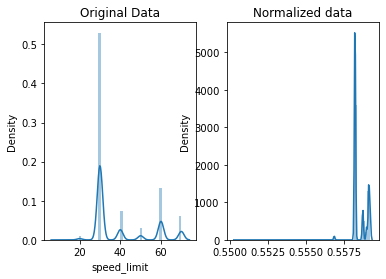

In [31]:
from scipy import stats

DF_final=encoded_TRF.copy()

index_of_positive_pledges = DF_final.speed_limit > 0
# get only positive pledges (using their indexes)
positive_pledges = DF_final.speed_limit.loc[index_of_positive_pledges]

# normalize the pledges (w/ Box-Cox)
normalized_pledges = stats.boxcox(positive_pledges)[0]
# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(positive_pledges, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_pledges, ax=ax[1])
ax[1].set_title("Normalized data")

In [35]:
# update speed_limit column with normalized values
DF_final.loc[index_of_positive_pledges, 'speed_limit'] = normalized_pledges

DF_final.head()
#Export DF
DF_final.to_csv('mydata.csv', index=False)